In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("nutrients_csvfile.csv")

In [ ]:
df.tail()
df.shape

(335, 10)

In [ ]:
df.describe(include="O")

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


In [ ]:
df.describe(include="O")

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


In [ ]:
df["Category"].value_counts()

Breads, cereals, fastfood,grains    45
Meat, Poultry                       30
Desserts, sweets                    29
Dairy products                      28
Vegetables A-E                      28
Vegetables R-Z                      28
Fruits G-P                          28
Fruits A-F                          22
Fish, Seafood                       19
Fats, Oils, Shortenings             14
Vegetables F-P                      14
Seeds and Nuts                      12
Drinks,Alcohol, Beverages           12
Soups                               10
Fruits R-Z                           8
Jams, Jellies                        8
Name: Category, dtype: int64

In [ ]:
df["Food"]=df["Food"].drop_duplicates(keep="first")

In [ ]:
df = df.dropna()

In [ ]:
df.replace("t",0,inplace=True)
df.replace("t'",0,inplace=True)
df.replace(",","", regex=True,inplace=True)
df['Fiber']=df['Fiber'].replace("a","", regex=True)
df['Calories'][91]=(8+44)/2

In [ ]:
column=["Grams","Calories","Protein","Fat","Sat.Fat","Fiber","Carbs"]
def get_numeric(df,column):
    # get numeric coulmns by converting into int or float
    df[column]= pd.to_numeric(df[column])

for i in range(len(column)):
    get_numeric(df,column[i])


In [ ]:
df.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat       int64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [ ]:
df.isnull().any()
df = df.dropna()
df.shape

(325, 10)

In [ ]:
df_category = df.groupby(['Category']).sum()
df_category=df_category.reset_index()

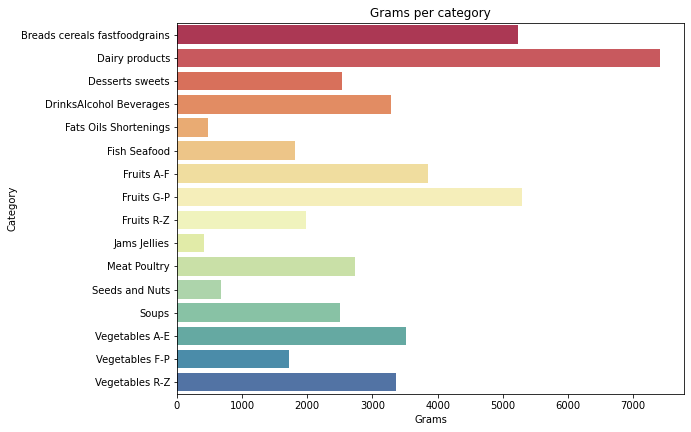

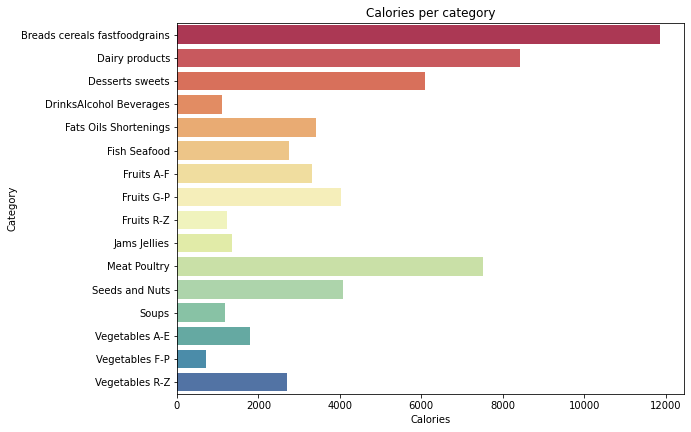

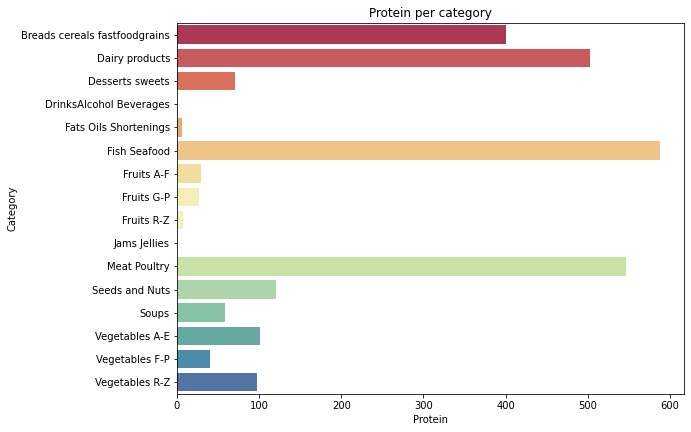

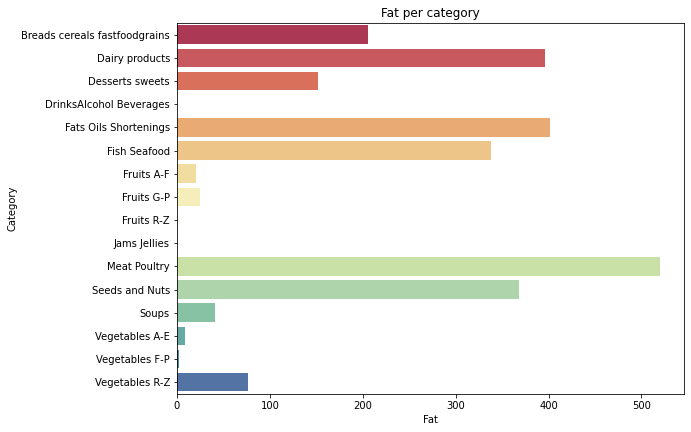

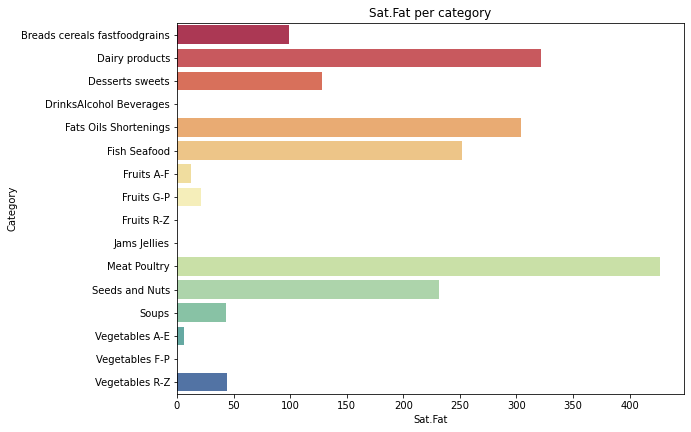

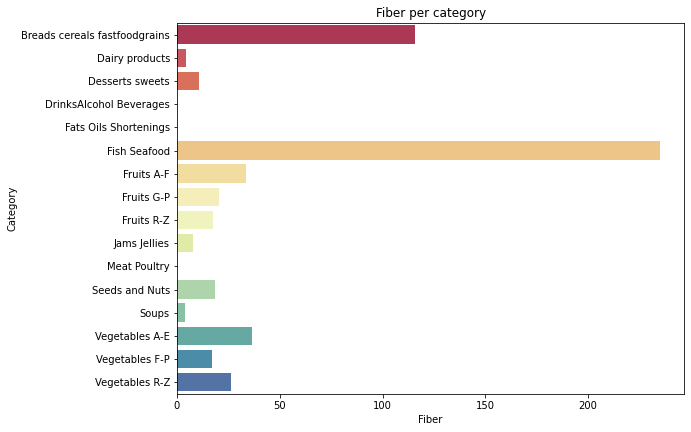

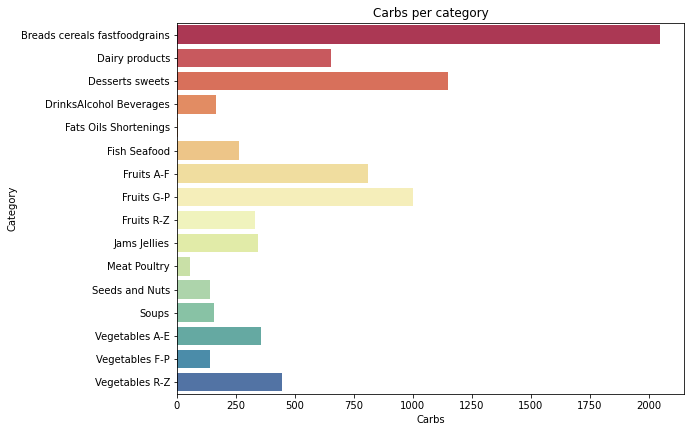

In [ ]:
from matplotlib import *
import sys
from pylab import *

def visual_category(df,column):
    #category vise visualisation per nutrient
    plt.figure(2, figsize=(20,15))
    the_grid = GridSpec(2, 2)
    plt.subplot(the_grid[0, 1],  title= '{} per category'.format(column))
    sns.barplot(x=column,y='Category', data=df_category, palette='Spectral')
    plt.show()
for i in range(len(column)):
    visual_category(df,column[i])

# Some Inference from the above bar plots:
1. Seafood has the highest protein content followed by meat poultry.
2. Highest number of fibres is also found in Fish Seafood.
3. It is clear that breads, grains and cereals have the highest amount of Carbs and Calories.
4. Fruits and vegetables do not have large contributuin in any of the category except carbs and calories.

## Normalise the data by calculating each nutrient value per Gram

In [ ]:
df1 =df.select_dtypes(exclude="object")
df1 = df1.apply(lambda x: (x/df1["Grams"]), axis = 0)
df2=df1.join(df, rsuffix='_old')

In [ ]:
cols = [c for c in df2.columns if c.lower()[-4:] != '_old']
df2=df2[cols]

In [ ]:
df_protein_rich = df2[df2["Category"].isin(["Fish Seafood",'Meat Poultry'])].sort_values(by="Protein",ascending =False)
df_protein_rich_top=df_protein_rich.sort_values(by='Carbs', ascending= True)
df_protein_rich_top=df_protein_rich_top.head(10)

In [ ]:
#High Protein low Carbs ( Healthiest Food )
df_protein_rich_top

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Food,Measure,Category
61,1.0,3.651163,0.232558,0.162791,0.162791,0.0,0.0,Leg roasted,3 oz.,Meat Poultry
87,1.0,2.000000,0.235294,0.117647,0.000000,0.0,0.0,Shad,3 oz.,Fish Seafood
48,1.0,3.882353,0.235294,0.317647,0.294118,0.0,0.0,Steak,3 oz.,Meat Poultry
65,1.0,2.982456,0.228070,0.228070,0.192982,0.0,0.0,Ham as,2 oz.,Meat Poultry
83,1.0,1.470588,0.223529,0.070588,0.011765,0.0,0.0,Oyster stew,1 cup,Fish Seafood
79,1.0,2.110000,0.220000,0.130000,0.000000,0.0,0.0,Herring,1 small,Fish Seafood
62,1.0,3.352941,0.211765,0.270588,0.247059,0.0,0.0,Shoulder braised,3 oz.,Meat Poultry
67,1.0,3.647059,0.247059,0.282353,0.247059,0.0,0.0,Pork roast,3 oz.,Meat Poultry
60,1.0,4.173913,0.208696,0.304348,0.286957,0.0,0.0,Lamb chop broiled,4 oz.,Meat Poultry
47,1.0,4.588235,0.188235,0.423529,0.411765,0.0,0.0,Roast beef,3 oz.,Meat Poultry


In [ ]:
import plotly.offline as py
import plotly.graph_objects as go
fig = go.Figure(go.Pie(values=df_protein_rich_top['Protein'].values, text=df_protein_rich_top['Food'],
                              title = { "text": "Top Protein enriched Seafood and Meat Poultry"},
               ))
fig.show()

In [ ]:
##As we have seen , high fats in meat poultry, dairy products fat oil shortenings
##Let's dig down to find the high fat products ( Unhealthiest Food)

In [ ]:
high_fat_products=df2.groupby('Category', as_index=False).apply(lambda x: x.sort_values(by='Fat',ascending=False).head(2)).reset_index(drop=True)

In [ ]:
high_fat_products.loc[high_fat_products["Fat"]<20,"Food"] ="Other"

In [ ]:
high_fat_products=high_fat_products.sort_values(by="Fat",ascending=False)

In [ ]:
fig = go.Figure(go.Funnelarea(values=high_fat_products['Fat'].values, text=high_fat_products['Category'],hovertext=high_fat_products['Food'],
                              title = { "text": "High Fat products per category"},
                             ))
fig.show()

Inference :
1. Except Oysters, every seafood has fat < 20 and high protein. So , seafood is the heathiest option.
2. In meat and poultry, bacon and pork sausage have the highest fats.
3. Avoid cream cheese and whipping cream in dairy products as it account maxium fat in dairy products
4. Rolls contain the high amount of fat in Breads and cereals category